María Garrido Gómez NIA:100363904

**SEÑAL DISCRETA**

Secuencia indexada de números reales o complejos en función de una variable entera *n*.

Clasificación de las señales discretas:

- Duración:

  - Secuencia finita.
  - Secuencia infinita.

- Aleatoriedad:

  - Secuencias deterministas: pueden reproducirse exactamente con medidas repetidas.
  - Secuencias aleatorias: no pueden repetirse de manera predecible.

**FILTROS DISCRETOS**

Un filtro es un sistema que transforma una señal de entrada (x[n]) en otra secuencia discreta (y[n]), denominada salida del filtro.

Propiedades de un filtro:

- Memoria: La salida en un determinado instante no depende de valores pasados ni
futuros de la entrada.

- Causal: La salida en un determinado instante no depende de valores futuros de la entrada.

- Invertible: Es posible recuperar la entrada al filtro conociendo la salida.

- Estabilidad: Para cualquier x[n] acotada, y[n] también está acotada.

- Linealidad: Dadas dos señales de entrada: x1[n] y x2[n], cuyas salidas respectivas son y1[n] e y2[n], cuando se presenta a la entrada del sistema
z[n] = αx1[n] + βx2[n], la salida se puede obtener como y[n] = αy1[n] + βy2[n].

- Invarianza: Dadas x[n] e y[n], se cumple que T {x[n − n0]} = y[n − n0], para
cualquier valor de n0.

Si un filtro es lineal e invariante en tiempo, puede caracterizarse mediante su respuesta al impulso h[n].

**ESQUEMA DE UN PROBLEMA DE FILTRADO**

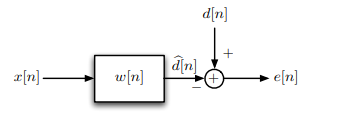

- Señal deseada (d[n]): construir db[n] tal que E{(d[n] − db[n])2}

- Señal de entrada (x[n]).

- Respuesta al impulso del filtro (w[n]).

- Señal de error: e[n] = d[n] −(x[n] ∗ w[n]). Minimizar su energía, de modo que
db[n] = x[n] ∗ w[n] sea un buena aproximación de d[n].

**TIPOS DE FILTROS LINEALES**

Según sea w[n], existen dos tipos de filtros:

- Filtros FIR (Finite Impulse Response): w[n] es una señal discreta finita.

- Filtros IIR (Infinite Impulse Response): w[n] es una señal discreta infinita.

**FILTROS ESTACIONARIOS Y ADAPTATIVOS**

- Filtros estacionarios:

  - Los coeficientes del filtro se obtienen una única vez y se mantienen
fijos durante toda la vida operativa del filtro.
  - El vector de pesos es constante en el tiempo.

- Filtros adaptativos:

  - Los coeficientes del filtro se actualizan constantemente cada vez que se
realiza una predicción.
  - El vector de pesos varía con el tiempo (sus valores dependen del
instante n).


**FILTRO DE WIENER**

Los filtros de Wiener son los mejores filtros lineales discretos de
mínimos cuadrados que pueden ser usados para predicción, estimación, interpolación, filtrado de señal y ruido...

Es un sistema al que le llegan dos señales: x[n] y db[n] y el objetivo es determinar la respuesta al impulso w[n] de tal manera que el filtro produzca a su salida una señal db[n].

Diferencia entre filtrar el ruido y cancelar el ruido:

- Filtrar ruido: la señal “contaminada” pasa por un filtro donde se espera
que se elimine la mayor parte del ruido.

- Cancelar ruido: se utiliza un filtro para aprender la señal de ruido y
restársela a la señal “contaminada”.


**FILTROS ADAPTATIVOS**

Cuando las señales no son estacionarias utilizamos filtrado adaptativo. Es un método iterativo de actualización del vector de pesos que considera la potencia del error de reconstrucción como una función de los pesos del filtro.
Las actualizaciones del vector de pesos han de ir en la dirección de encontrar el mínimo de esta superficie de error.

Esquema:

- Predicción: cuando llega la muestra x[n], el filtro realiza una predicción de la señal deseada db[n] = w[n]|x[n].

- Cálculo de error: se le comunica al filtro el valor real de d[n] y se calcula el error cometido por el filtro en la muestra: e[n] = d[n] − db[n].

- Actualización: A partir de e[n], se obtiene la actualización ∆w[n] y, a continuación, los coeficientes w[n + 1] que se usarán para procesar la muestra x[n + 1].



In [ ]:
from IPython.core.display import Image, display
from IPython.display import Audio
from scipy.io import wavfile

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# A Modern Theory of Detection and Estimation
### Fall 2020

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;
# Lab 3. Linear Filtering for active noise cancellation



# 1. Description of the active noise cancellation

In this lab assesment we will simulate a typical airplane cockpit working environment, in which a strong background noise is always present, complicating communications between the pilot and crew.

Let's assume there are two microphones: 
1. The main mic which captures the pilot's voice as well as the cockpit environment noise.
2. A secondary mic which only captures the cockpit noise.

Let's also assume that the pilot's voice ($s[n]$) and the cockpit noise ($v[n]$) are incorrelated, but the noise in the pilot's mic ($v_1[n]$) and in the secondary mic ($v_2[n]$) are correlated.

The **basic idea underlying this practice** is to **use a filter to eliminate the additive background noise**. In this scenario, the **input signal** to the filter is the **noise in the secondary mic** ($v_2[n]=x[n]$) and the **reference signal (desired signal) is the output of the main mic** ($d[n]$), that is, the pilot's voice plus noise (please, see the Figure below for further details).


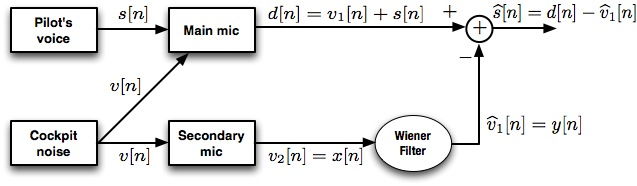






Since the input signal ($x[n]=v_2[n]$) is only correlated with the noise component of the reference signal ($v_1[n]$), the filter will be only able to create a good approximation of this noise component in the main mic ($y[n]= \widehat{v}_1[n]$). Therefore, the error signal of the filter will be an approximation to the pilot voice.

# 2. Measure of performance

For a finite signal $x[n]$ with a duration of $N$ samples, the average instant power can be computed as follows:
$$
x[n] \longrightarrow P_x = \frac{1}{N}\sum_{i=1}^{N}{x^2[i]} = \frac{1}{N}\sum_{i=1}^{N}{(v_1[i] - \widehat{v_1}[i])^2}
$$

If the signal $x[n]$ is the error signal, the average instant power can be seen as the mean square error (MSE).

In this assesment, in order to measure performance, we will compute the average instant power of the diference between the original signal and its reconstruction. As we will see later, this original signal will be the noise in the pilot's mic ($v_1[n]$) and the reconstructed signal will be the output of the Wiener filter ($\widehat{v}_1[n]$).

# 3. Signals involved

## 3.1 Voice (10% of the final mark)

The pilot's voice: to simplify the problem, we will use a single sinusoid (pure tone) lasting 2 seconds (more realistic signals, such as an actual voice clip, could also be used). Lets assume a sampling frequency of 8.000 Hz and a frequency of 20 Hz.

In [ ]:
N_segundos = 2
fs = 8000 #frecuencia de muestreo: 8000 muestras/s
fp = 20 #frecuencia de la señal
N_muestras = N_segundos*fs #16000 muestras
t=np.linspace(0,N_segundos,N_muestras)

s=np.sin(2*np.pi*fp*t)


Let us plot the pilot's voice over time (in seconds).

Text(0.5, 1.0, "pilot's voice")

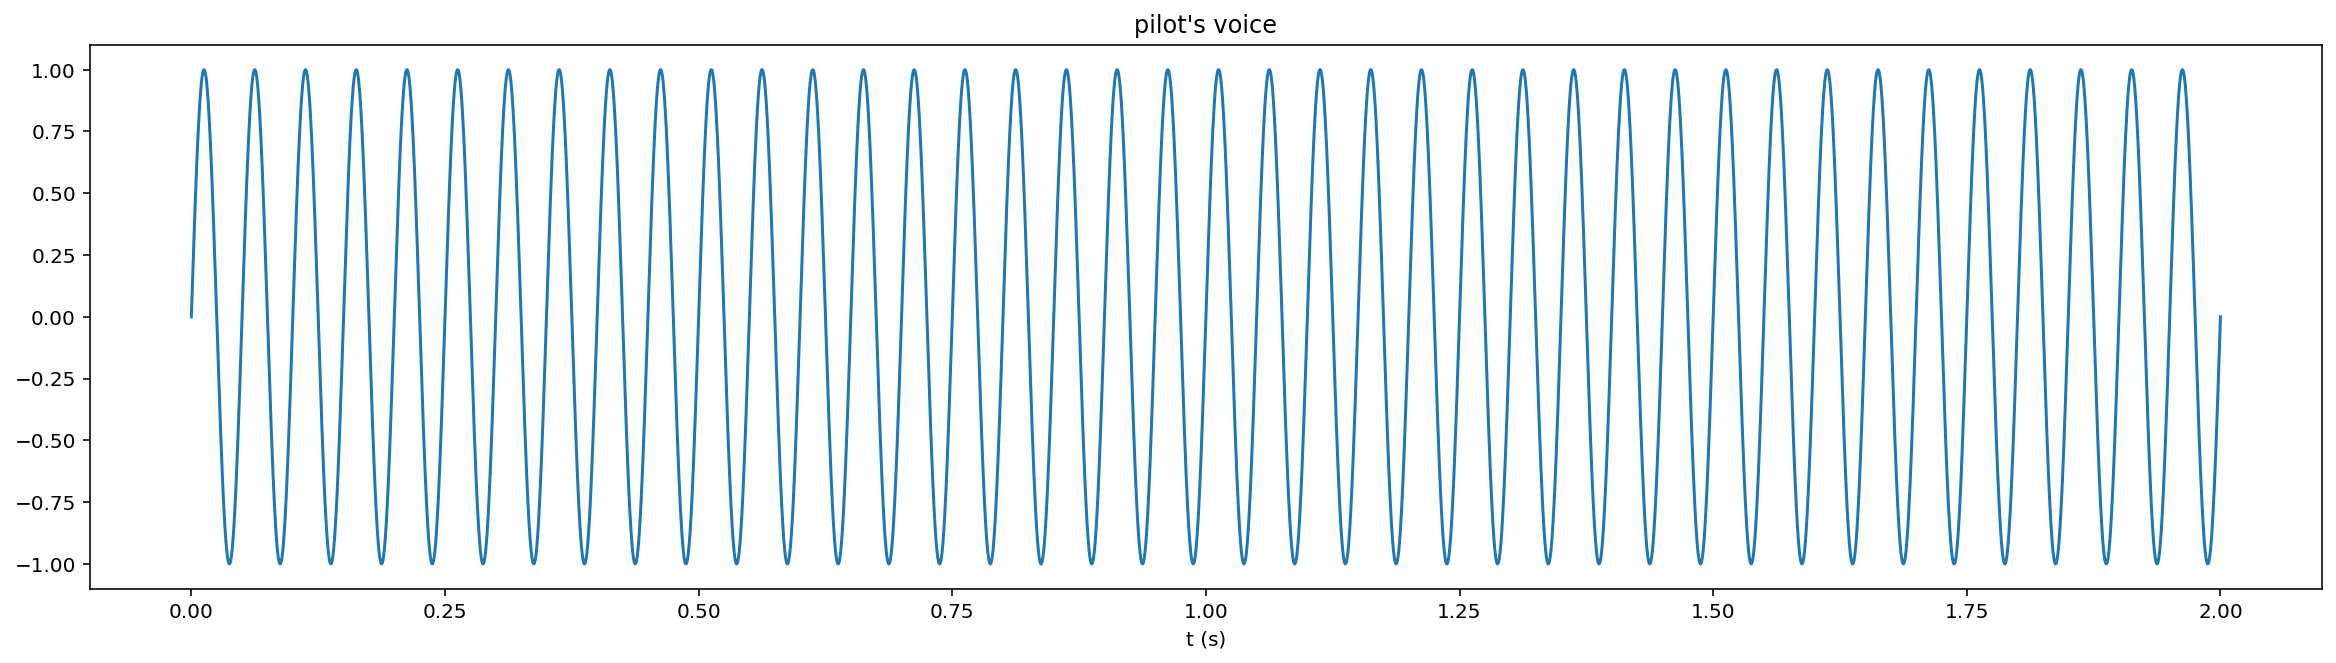

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,s, label="pilot's voice")
plt.xlabel('t (s)')
plt.title("pilot's voice")

## 3.2 Noise scenario 1 (10% of the final mark)

At this point we can consider different noise scenarios for the problem. 

In particular, we will start by setting the cockpit noise to a random normal signal (with the same duration in seconds as the pilot's voice).

With this scenario in mind, the noise in both the pilot's microphone and the cokpit's microphone can be calculated as follows:

$$
v_{1,2}[n] = 2*e^{-n / \sigma_{1,2}} \circledast v[n]
$$
where the exponential component represents each microphone's channel, with $\sigma_1 = 0.05$ for the noise in the pilot's microphone ($v_1[n]$) and $\sigma_2 = 0.0005$ for the cockpit microphone's noise ($v_2[n]$), and $v[n]$ is a random normal signal representing the cockpit's background noise.

The pilot's microphone noise is also attenuated by a factor of 0.1.

Finally, the pilot's microphone noise must be added to the pilot's voice to obtain the main (pilot) mic's output signal.

Plot the two noise signals and the complete input in the pilot's microphone.

Text(0.5, 0, 'time (s)')

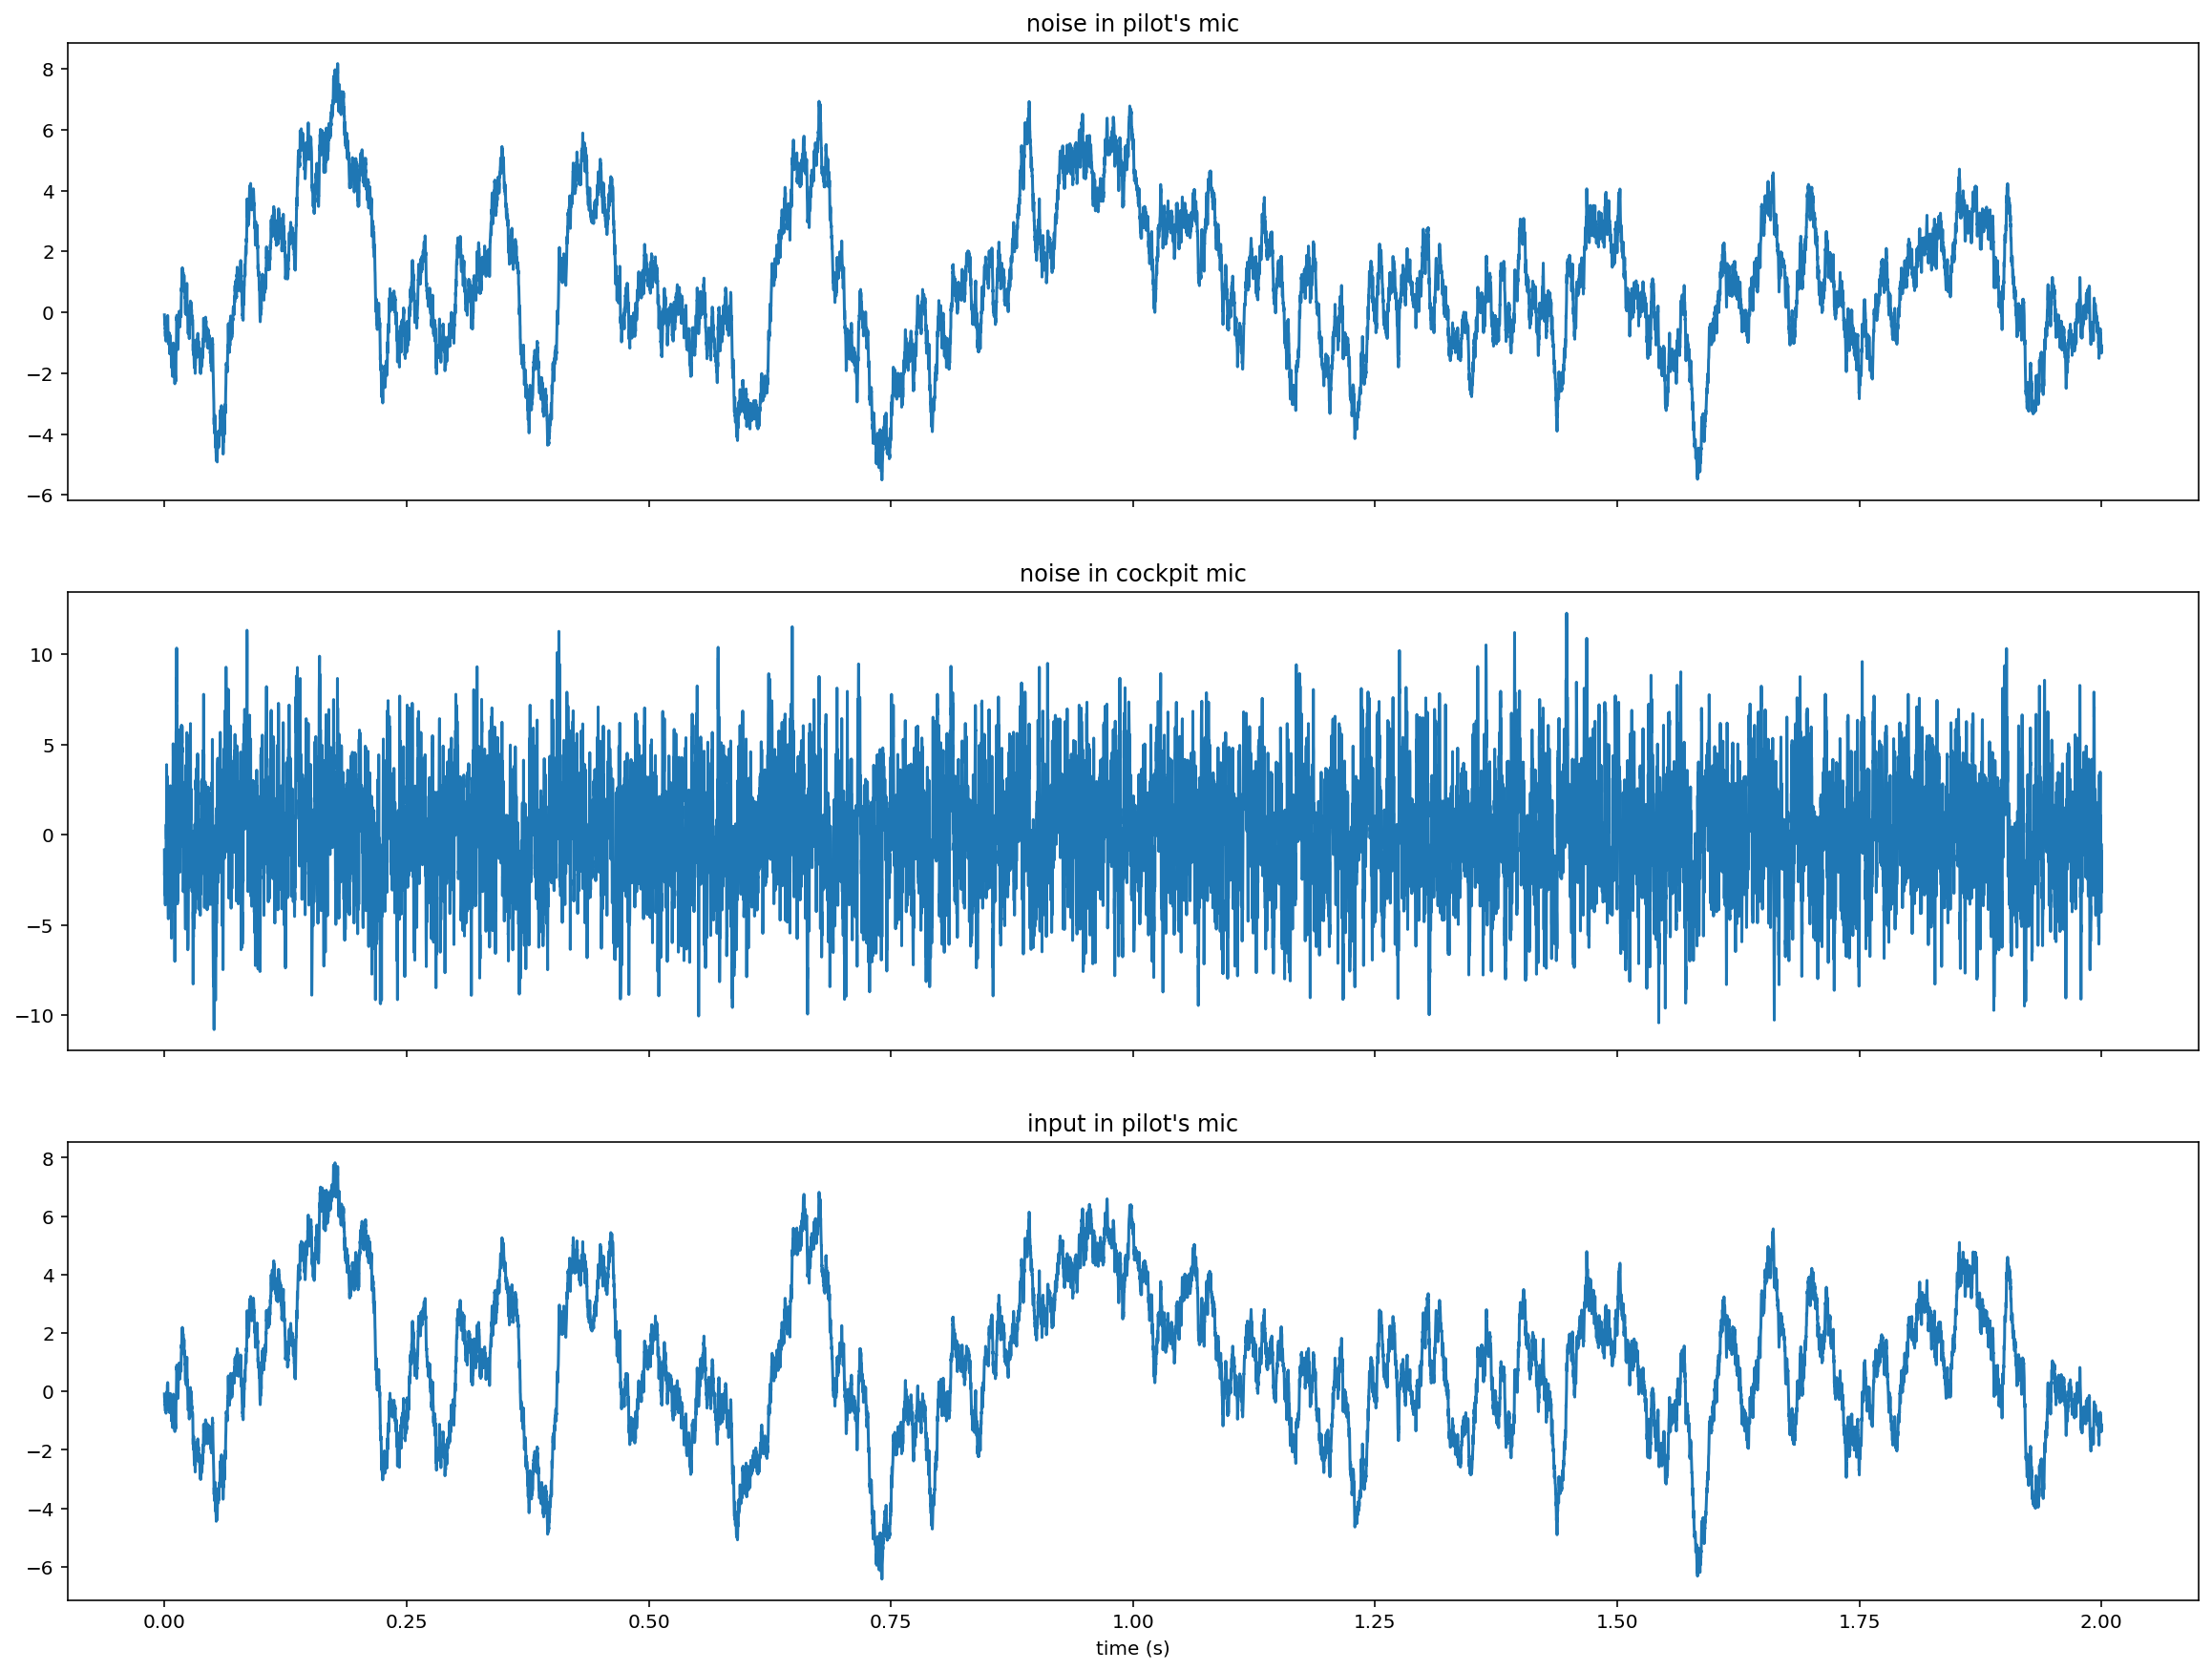

In [ ]:

vn = np.random.randn(N_muestras) #ruido blanco gaussiano v[n], de media 0 y varianza 1 para 16000 muestras
sigma1 = 0.05
sigma2 = 0.0005

vn1 = 2*np.convolve(np.exp(-t/sigma1), vn) #ruido del micrófono del piloto
vn2 = 2*np.convolve(np.exp(-t/sigma2), vn) #ruido de cabina
vn1_r = vn1[:len(t)]*0.1
vn2_r = vn2[:len(t)]

d1 = vn1_r + s
x1 = vn2_r.copy()

ff, aa = plt.subplots(3,1, figsize=(20,15), sharex=True)

aa[0].plot(t, vn1_r, label ="noise in pilot's mic")
aa[0].set_title("noise in pilot's mic")

aa[1].plot(t, vn2_r, label ="noise in cockpit mic")
aa[1].set_title("noise in cockpit mic")

aa[2].plot(t,d1, label="input in pilot's mic")
aa[2].set_title("input in pilot's mic")

aa[2].set_xlabel("time (s)")

## 3.3 Noise scenario 2 (10% of the final mark)


In this scenario, the noise in the pilot's microphone will be defined as follows:

$$
v_1[n] = 2\cdot v[n]
$$

and the noise in the cockpit's microphone as:
$$
v_2[n] = \sin\Bigg(\frac{1}{1+\exp^{- 2\cdot v[n]}}\Bigg)
$$

Plot the two noise signals and the complete input in the pilot's microphone.

Text(0.5, 0, 'time (s)')

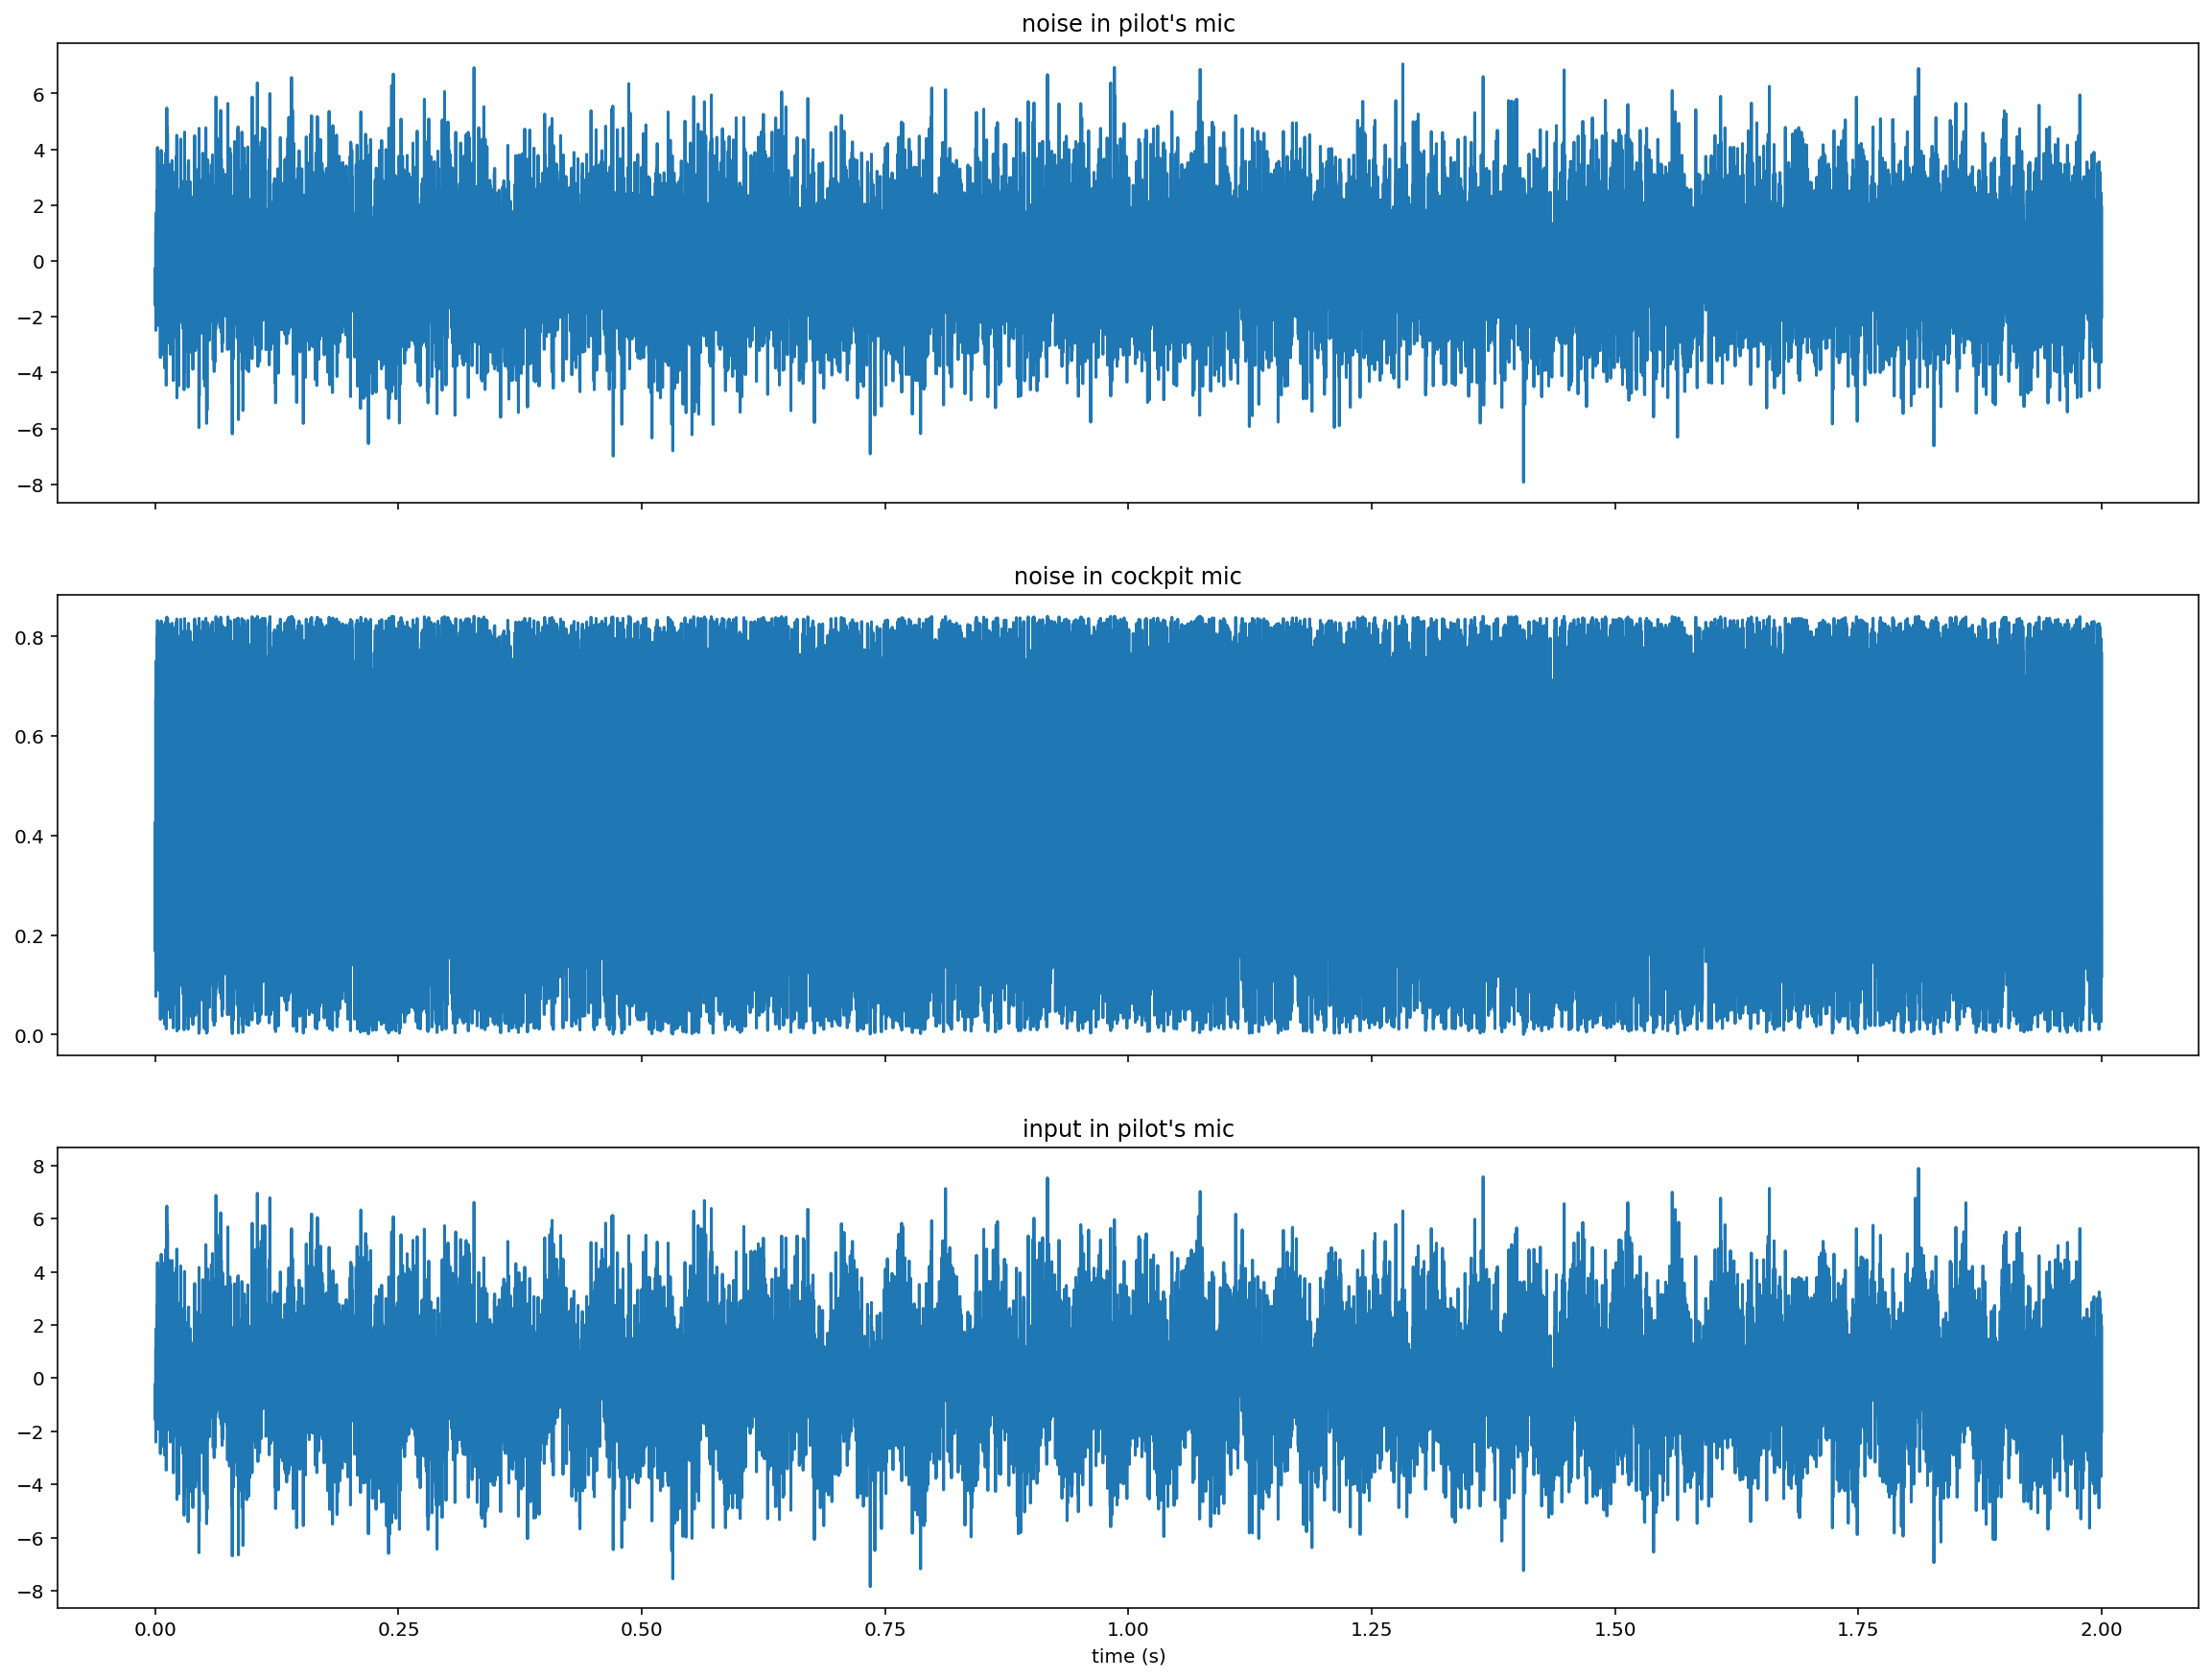

In [ ]:
vn1_2 = 2*vn
vn2_2 = np.sin(1/(1 + np.exp(-2*vn)))

d2 = vn1_2 + s

x2 = vn2_2.copy()

ff, aa = plt.subplots(3,1, figsize=(20,15), sharex=True)

aa[0].plot(t, vn1_2, label ="noise in pilot's mic")
aa[0].set_title("noise in pilot's mic")

aa[1].plot(t, vn2_2, label ="noise in cockpit mic")
aa[1].set_title("noise in cockpit mic")

aa[2].plot(t,d2, label="input in pilot's mic")
aa[2].set_title("input in pilot's mic")
aa[2].set_xlabel("time (s)")

#4. Wiener Filter solution

We will now use a Wiener filter to try to reconstruct the original signal from the noisy ones.

## 4.1. Check correlations (20% of the final mark)


One of the main premises of these filters relies on the assumption that the two noise components are correlated and the original signal (the pilot's voice) is incorrelated with both noise components. Let us analyse the correlation between signals to verify that we can apply this kind of filter.

### 4.1.1. Construct a function that computes the correlation of two signals up to $M$ time instants

The first thing we need to do is to implement a new funtion that computes the correlation between two signals in a period of time. To do so, 
we will define our signals in the following compact way
$$
X = \begin{pmatrix}
x[M] & x[M-1] & \dots & x[1]\\
x[M+1] & x[M] & \dots & x[2]\\
\vdots & \vdots & \ddots & \vdots\\
x[N] & x[N-1] & \dots & x[N-M+1]\\
\end{pmatrix}; \qquad d = \begin{pmatrix}
d[M] \\ d[M+1] \\ \dots \\ d[N]
\end{pmatrix}
$$
Keeping both of these definitions in mind, we will define the cross correlation between $x$ and $d$ as
$$\widehat{r}_{xd} = \frac{1}{N - M + 1} X^T d$$
where $N$ is the number of samples and $M$ is the number of time instants to compute.

Note: These definitions will change if we include previous padding to the signals.

In [ ]:

def my_sample_correlation(x, d, M):
  N = len(x)
  Nr = N-M+1
  
  X = np.zeros((Nr,M))
  for ii in range(M):
    X[:,M-1-ii] = x[ii:ii+Nr]
  r_xd = 1./Nr * X.T.dot(d[M-1:]) #Autocorrelación
  return r_xd




### 4.1.2 Plot the correlation between pilot's voice and the two noise components, and the correlation of the two noise components for the first noise scenario

Use the previous function to obtain the correlation among the signals in the **first scenario**:
 
*   The pilot's voice and the noise in pilot's microphone
*   The pilot's voice and the noise in cockpit's microphone
*   The noise in pilot's microphone and the noise in cockpit's microphone.

After that, plot the three correlations.

$\underline{\text{Note}}$: To compute the correlation, let us assume $M=20$.




Text(0.5, 0, 'k')

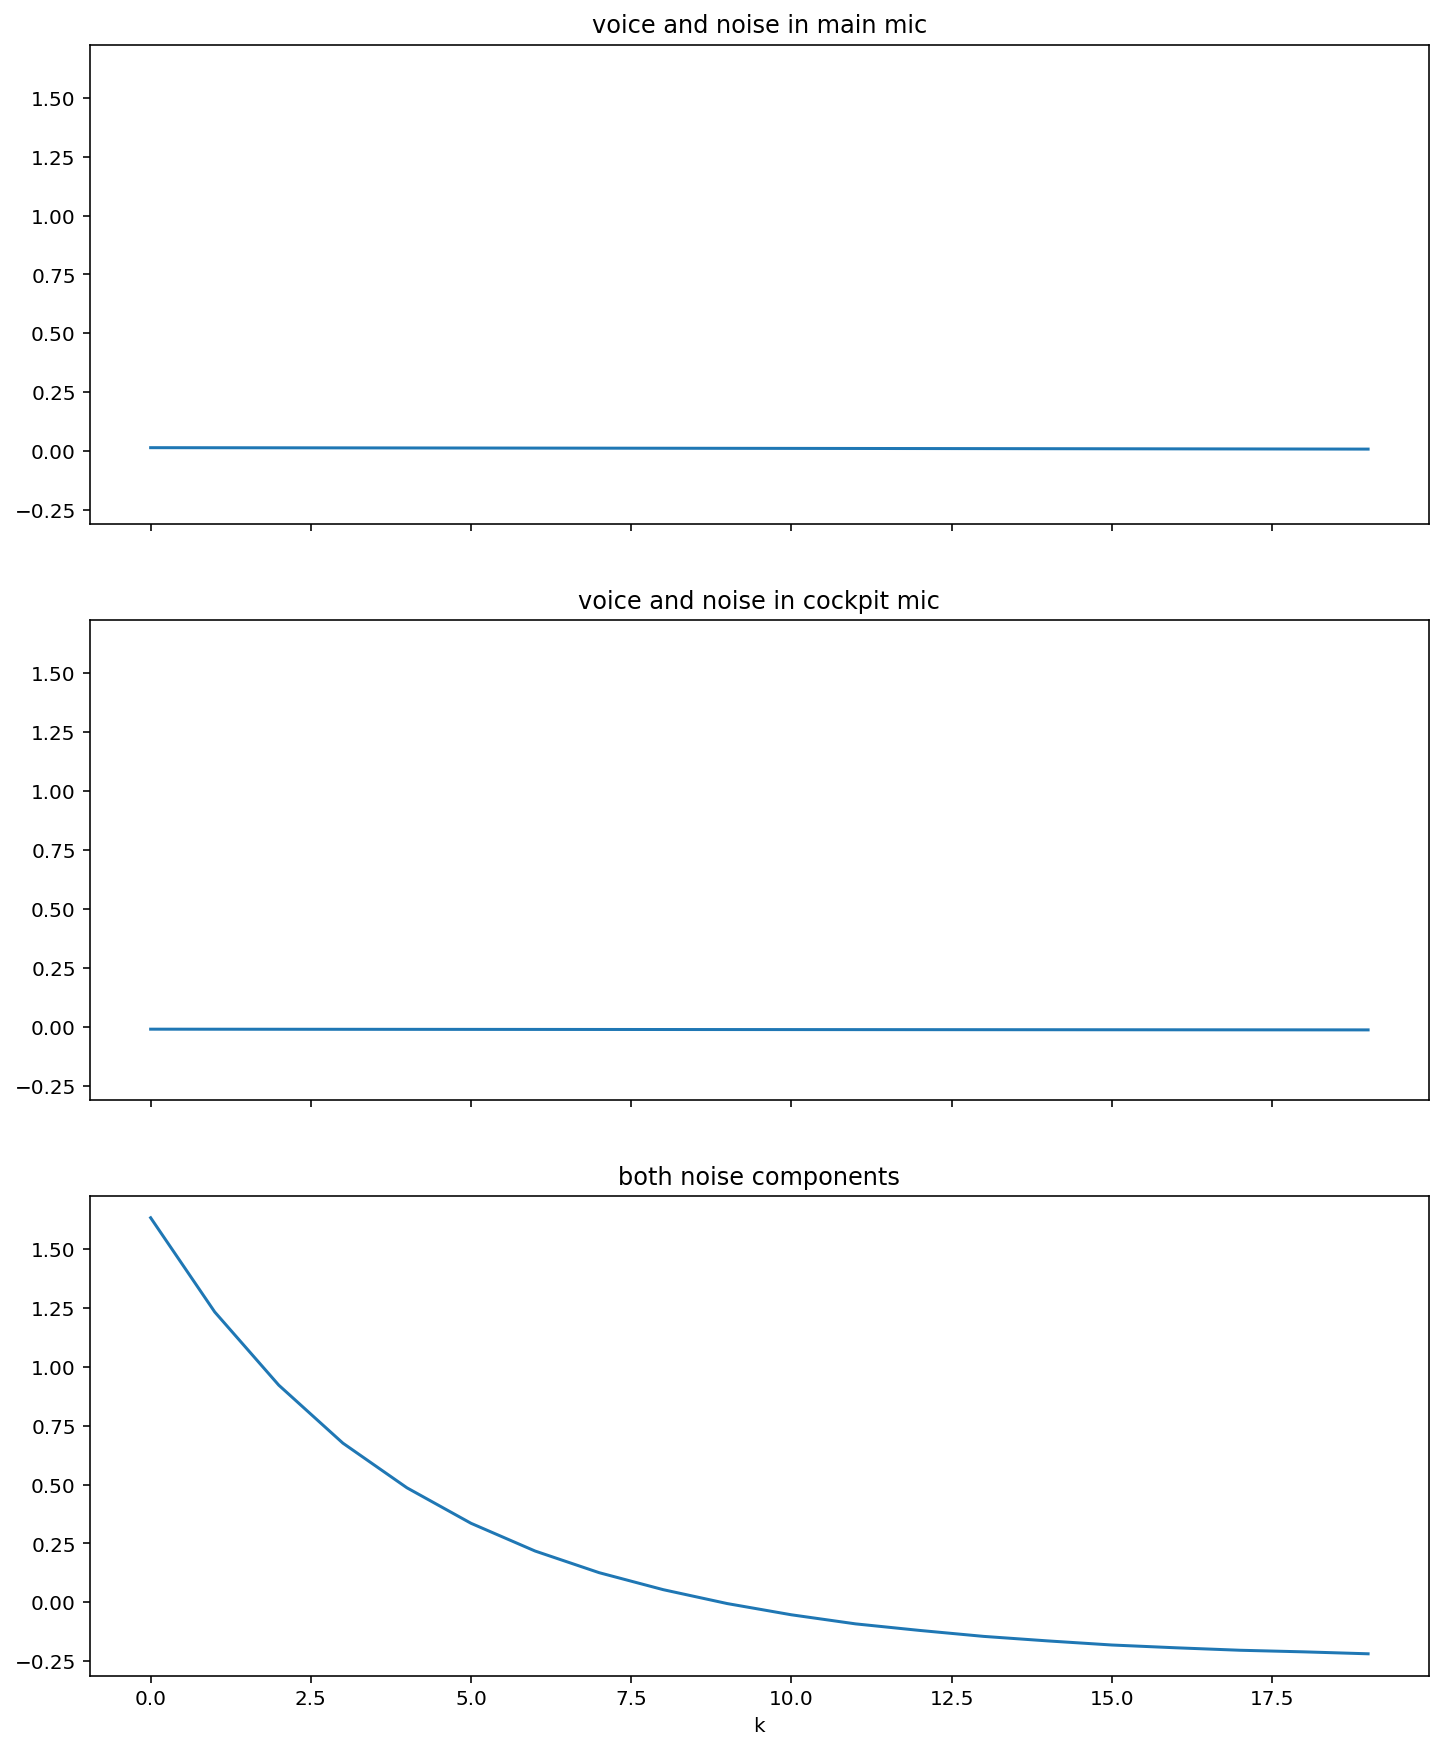

In [ ]:
ff, aa = plt.subplots(3,1, sharex= True,figsize=(12,15), sharey=True)

rxy = my_sample_correlation(s, vn1_r, 20) #señal y ruido incorrelados, autocorrelación 0
aa[0].plot(rxy)
aa[0].set_title('voice and noise in main mic')

rxy = my_sample_correlation(s, vn2_r, 20) #señal y ruido incorrelados, autocorrelación 0
aa[1].plot(rxy)
aa[1].set_title('voice and noise in cockpit mic')

rxy = my_sample_correlation(vn1_r, vn2_r, 20)
aa[2].plot(rxy)
aa[2].set_title('both noise components')
aa[2].set_xlabel('k')




### 4.1.3 Plot the correlation between pilot's voice and the two noise components, and the correlation of the two noise components for the second noise scenario

Now, obtain and plot the correlations for the **second scenario**:

*   The pilot's voice and the noise in pilot's microphone
*   The pilot's voice and the noise in cockpit's microphone
*   The noise in pilot's microphone and the noise in cockpit's microphone.

$\underline{\text{Note}}$: To compute the correlation, let us assume $M=20$.


Text(0.5, 0, 'k')

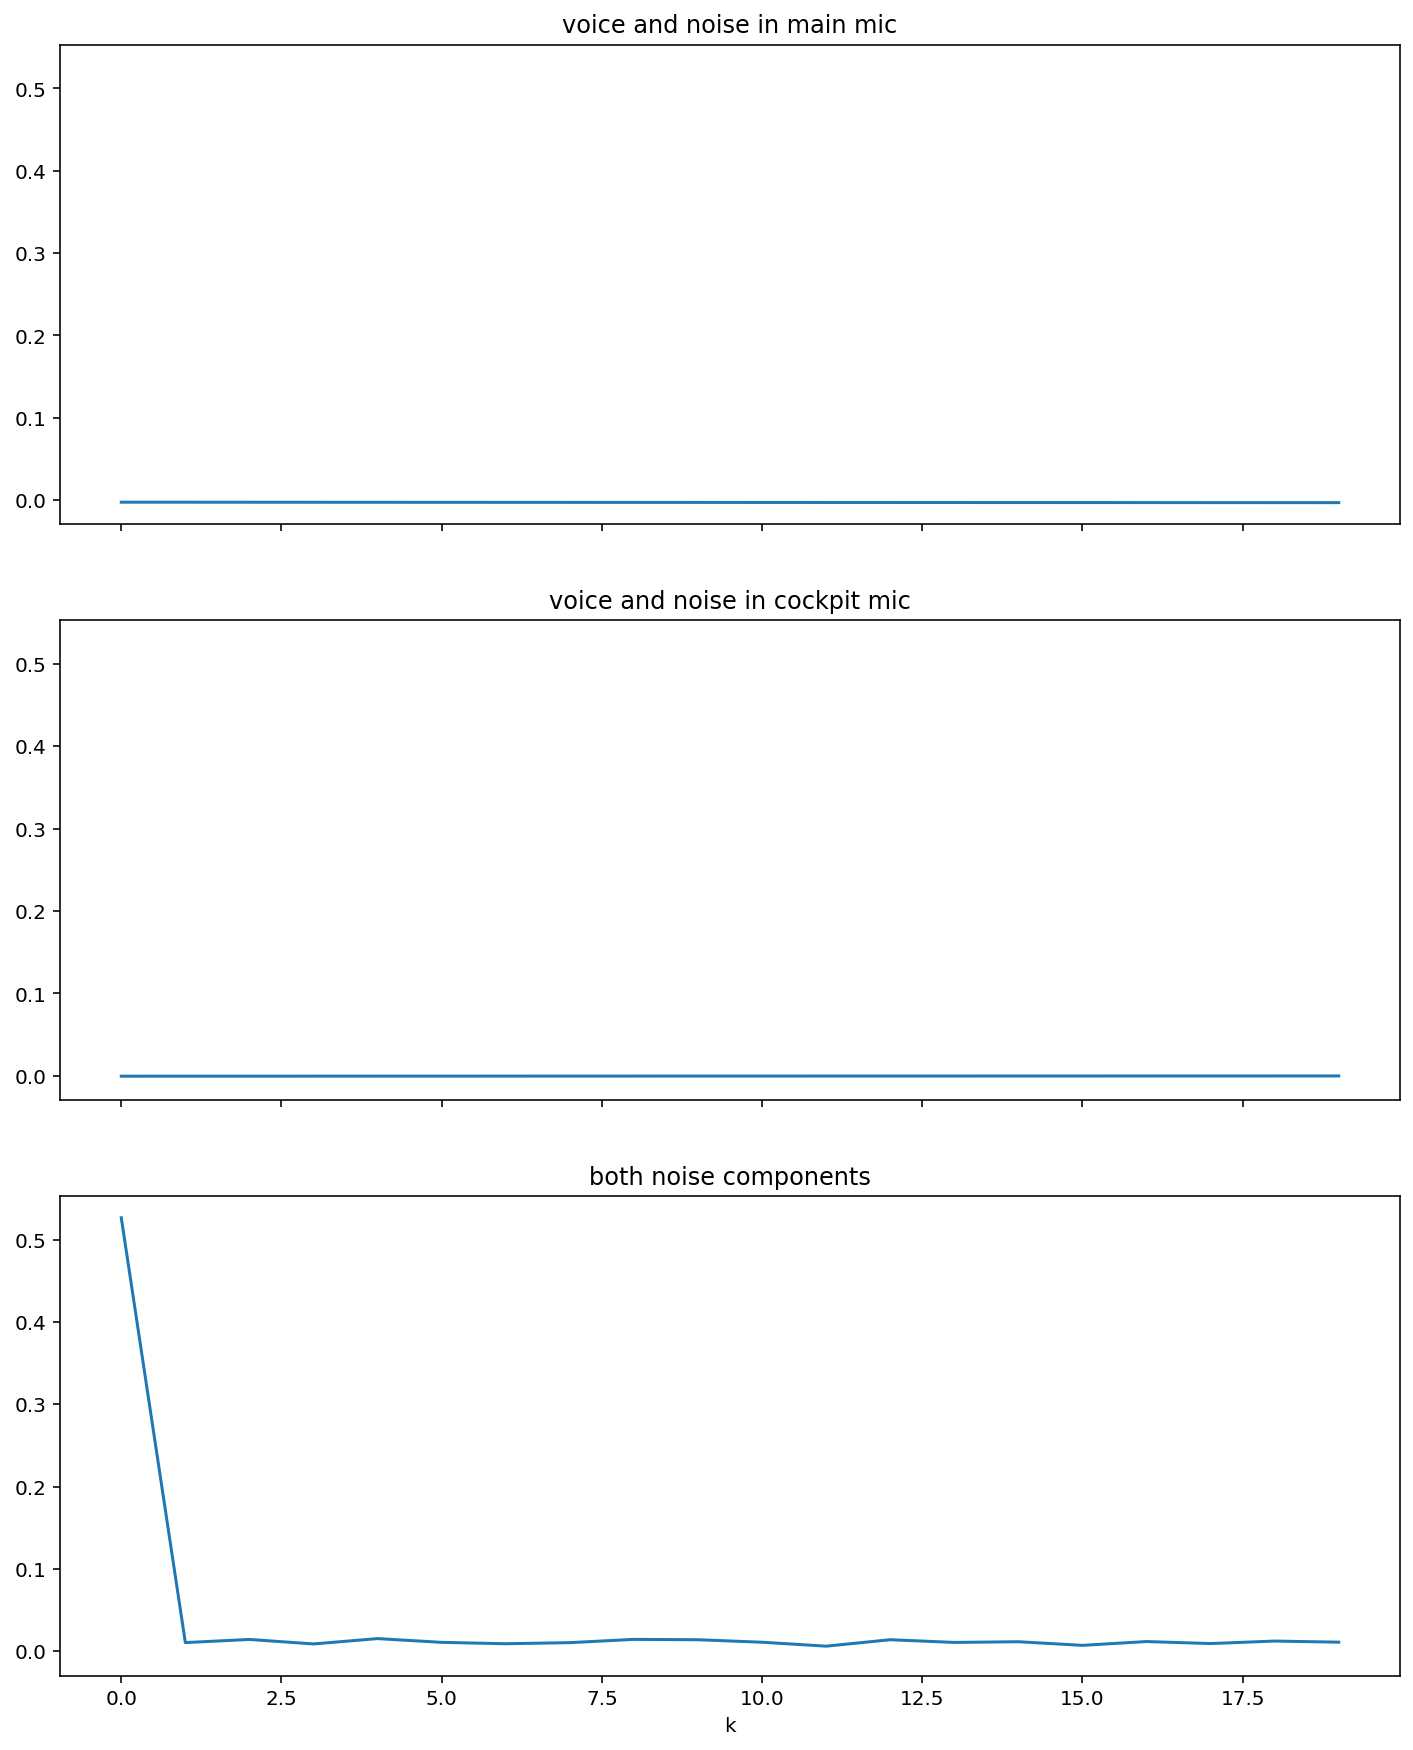

In [ ]:
ff, aa = plt.subplots(3,1, sharex= True,figsize=(12,15), sharey=True)

rxy = my_sample_correlation(s, vn1_2, 20) #señal y ruido incorrelados, autocorrelación 0
aa[0].plot(rxy)
aa[0].set_title('voice and noise in main mic')

rxy = my_sample_correlation(s, vn2_2, 20) #señal y ruido incorrelados, autocorrelación 0
aa[1].plot(rxy)
aa[1].set_title('voice and noise in cockpit mic')

rxy = my_sample_correlation(vn1_2, vn2_2, 20)
aa[2].plot(rxy)
aa[2].set_title('both noise components')
aa[2].set_xlabel('k')


## 4.2. Implementation of the Wiener Filter (20% of the final mark)


### 4.2.1 Autocorrelation matrix
Extend the `my_sample_correlation` to also return the autocorrelation matrix of a signal `x`, $Rxx$, defined as
$$\widehat{R}_{xx} = \frac{1}{N - M + 1} X^T X$$V

In [ ]:
def my_sample_correlation_wiener(x, d, M):

  N = len(x)
  Nr = N-M+1
  
  X = np.zeros((Nr,M))
  for ii in range(M):
    X[:,M-1-ii] = x[ii:ii+Nr]
  return 1./Nr * X.T.dot(X), 1./Nr* X.T.dot(d[M-1:]) #correlación cruzada y autocorrelación para filtro de Wiener



### 4.2.2 Obtain the weights of the Wiener filter:

The weights of the Wiener filter can be obtained as the product of the inverse of the autocorrelation of x and the correlation vector among both signals X and Y
$$
\mathbf{w} = \widehat{R}_{xx}^{-1}\widehat{r}_{xd}
$$




In [ ]:
#Coeficientes del filtro de Wiener
def wiener(x, d, M):

  Rxx, rxd = my_sample_correlation_wiener(x, d, M)
  return np.linalg.inv(Rxx).dot(rxd)


### 4.2.3 Filter and evaluation

Obtain the output of the Wiener filter ($Y$), for an input signal $X$:

$${y}[n] = \sum_{m=0}^{M-1}{w}[m]{x[n-m]}$$

After that, we need to implement a function that obtains the error signal of the filter (which in our use case is an approximation of the pilot's voice).

$$e[n]={d}[n]-{y}[n] \equiv \widehat{s}[n]$$

where $y[n] = \widehat{v}_1[n]$.

In [ ]:
def wiener_predict(w, x):

  M = len(w)
  N = len(x)
  Nr = N-M+1
  X = np.zeros((Nr,M))

  for ii in range(M):
    X[:,M-1-ii] = x[ii:ii+Nr]
  print(X.shape)
  return X.dot(w)
   
def wiener_error(w, x, d):
  
  M = len(w)
  return d[M-1:] - wiener_predict(w,x)

## 4.3 Evaluation first scenario (10% of the final mark)


Now, we are going to analyze the effect of $M$ in the **first scenario**.

For different values of $M$: 5, 10, 50, 100, 500, 1000, 2000

*   Obtain the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure both the pilot's voice and the error signal returned by the Wiener filter.

After a certain value of $M$, the error signal of the filter will be an approximation of the pilot's voice.





In [ ]:
d_W_1 = {}
d_error_1 = {}
v_M = [5,10,50,100,500,1000,2000]

for M in v_M:

  w1 = wiener(x1, d1, M)
  d_W_1[M] = w1
  d_error_1[M] = wiener_error(w1, x1, d1)


(15996, 5)
(15991, 10)
(15951, 50)
(15901, 100)
(15501, 500)
(15001, 1000)
(14001, 2000)


Text(0.5, 0, 'time (s)')

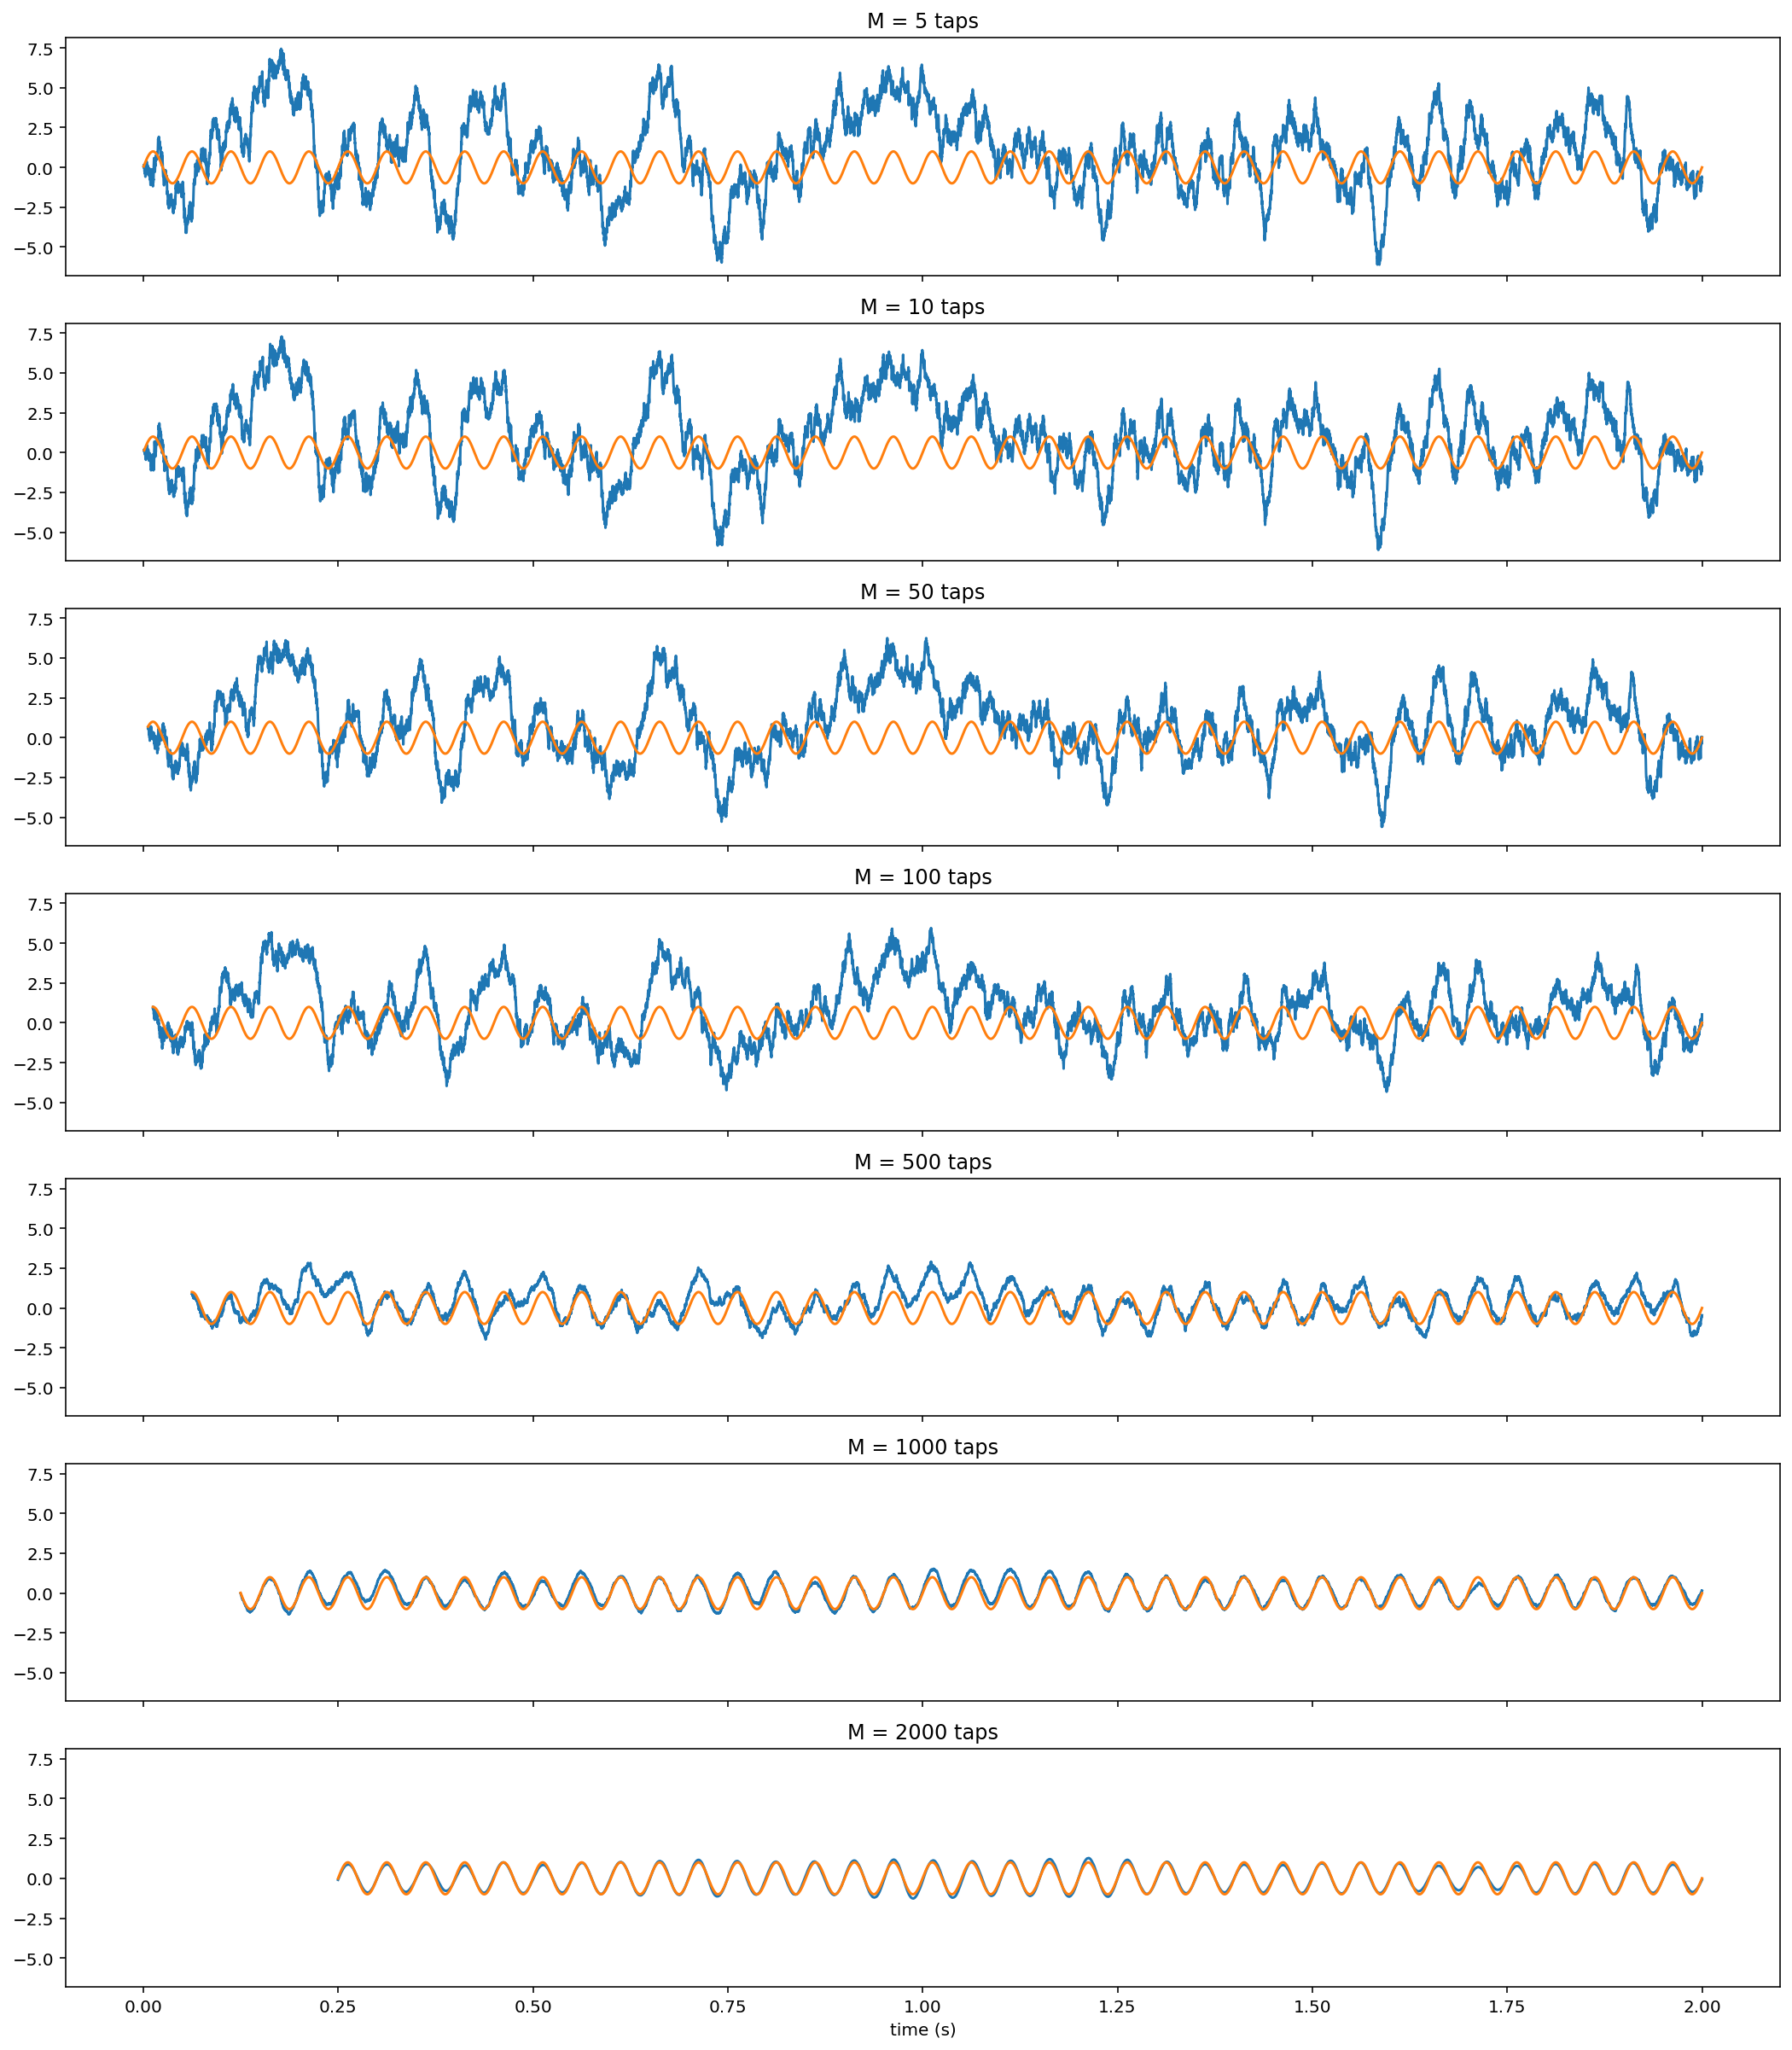

In [ ]:
ff, aa = plt.subplots(len(v_M), sharex=True, figsize=(18, 3*len(v_M)), sharey = True)
for ii, M in enumerate(v_M):
  aa[ii].plot(t[M-1:], d_error_1[M])
  aa[ii].plot(t[M-1:], s[M-1:])
  aa[ii].set_title('M = {0:d} taps'.format(M))
  
aa[6].set_xlabel('time (s)')




## 4.4 Evaluation second scenario (10% of the final mark)


Next, we are going to analyze the effect of $M$ in the **second scenario**.

For different values of $M$: 5, 10, 50, 100, 500, 1000, 2000

*   Obtain the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure, both pilot's voice and the error signal returned by the Wiener filter.

As in the previous case, after a certain value of $M$, the error signal of the filter will be an approximation to the pilot's voice.

In [ ]:
d_W_2 = {}
d_error_2 = {}
v_M = [5,10,50,100,500,1000, 2000]

for M in v_M:

  w2 = wiener(x2, d2, M)
  d_W_2[M] = w2
  d_error_2[M] = wiener_error(w2, x2, d2)


(15996, 5)
(15991, 10)
(15951, 50)
(15901, 100)
(15501, 500)
(15001, 1000)
(14001, 2000)


Text(0.5, 0, 'time (s)')

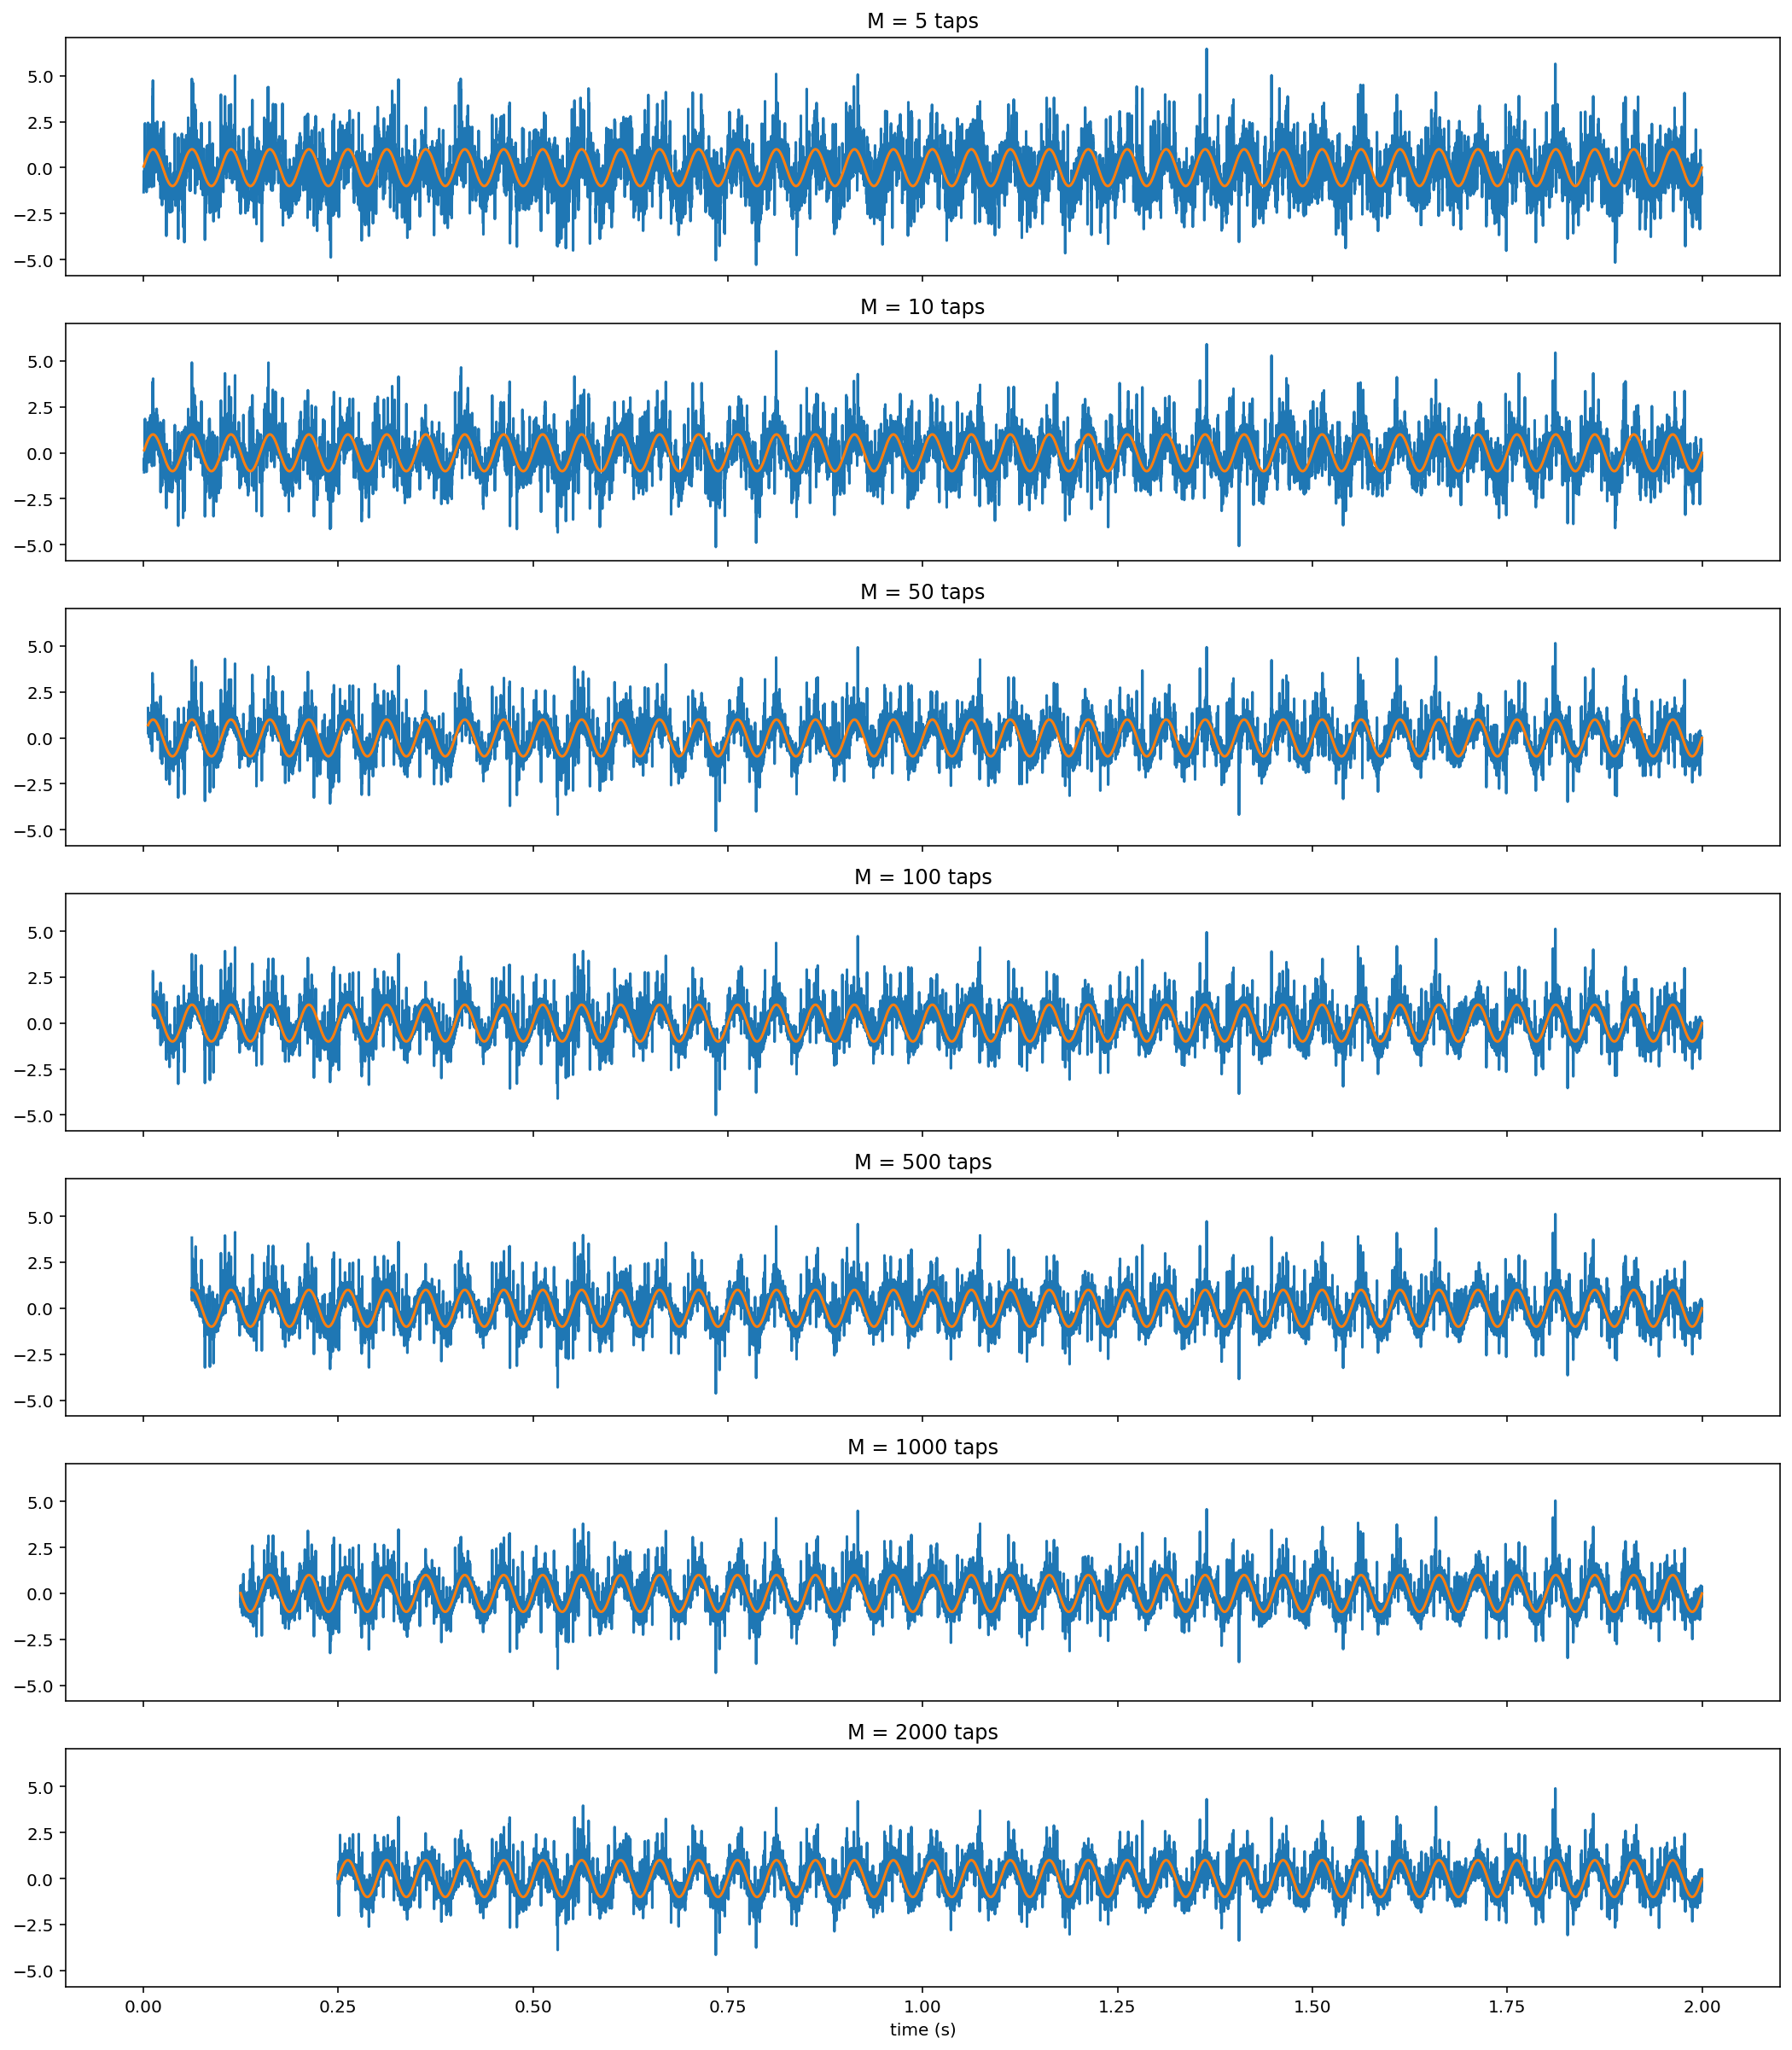

In [ ]:
#más ruido porque está menos correlado
ff, aa = plt.subplots(len(v_M), sharex=True, figsize=(18, 3*len(v_M)), sharey = True)
for ii, M in enumerate(v_M):
  aa[ii].plot(t[M-1:], d_error_2[M])
  aa[ii].plot(t[M-1:], s[M-1:])
  aa[ii].set_title('M = {0:d} taps'.format(M))

aa[6].set_xlabel('time (s)')

## 4.5 Mean Square Error (10% of the final mark)


Now, let's compute the mean square error as a function of $M$. To this end, for both scenarios, plot a figure that represents $M$ in the horizontal axis and the mean square error of the filter error and the original signal in the vertical axis.

Please, note that the filter error is computed as follows:

$$\widehat{s}[n]={d}[n]-{y}[n] = s[n] + v_1[n] -  \widehat{v}_1[n]$$

Bearing this in mind, the difference between the filter error and the original pilot's voice will be:
$$\widehat{s}[n]-s[n]=s[n] + v_1[n] -  \widehat{v}_1[n] - s[n] = v_1[n] -  \widehat{v}_1[n]  $$

It is advised to use a logarithmic scale range for the plots!


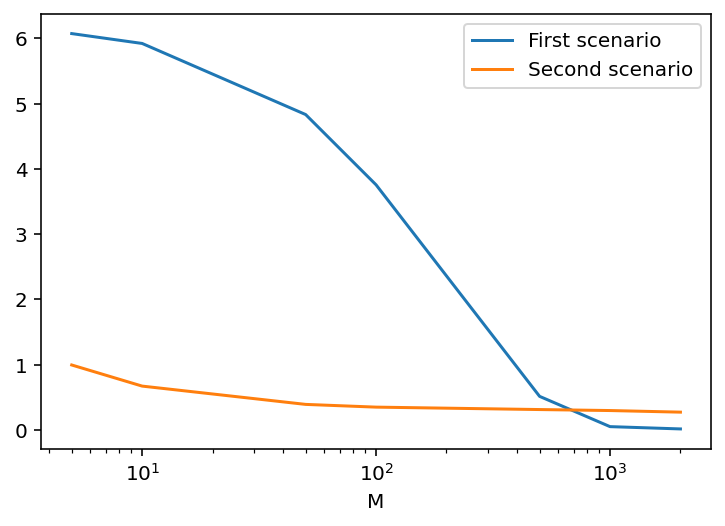

In [ ]:
mse1 = np.empty(len(v_M))
mse2 = np.empty(len(v_M))

for ii, M in enumerate(v_M):
  mse1[ii] = np.mean((d_error_1[M] - s[M-1:])**2) #error cuadrático medio primer escenario
  mse2[ii] = np.mean((d_error_2[M] - s[M-1:])**2) #error cuadrático medio segundo escenario

plt.figure()
plt.plot(v_M, mse1, label = 'First scenario')
plt.plot(v_M, mse2, label = 'Second scenario')
plt.xscale('log')
plt.xlabel('M')
plt.legend()

#Los ruidos más correlados son los del escenario 1 y la gráfica nos dice que el error cuadrático es mucho mayor en el 1 que en el dos
#para valores muy pequeños de M, el filtro en el escenario 1 no funciona bien

# Justify the observed results. 

Does the difference between the two scenarios make sense?

En la gráfica observamos que en el escenario 1, aunque los ruidos estén más correlados, para valores muy pequeños de M el filtro no funciona bien. Esto hace que el error cuadrático medio sea mucho mayor que para valores grandes de M. 

Sin embargo, en el escenario 2, el error cuadrático medio se mantiene más o menos constante, ya sea para valores pequeños o grandes de M.

# 5. With audio

Repeat the above but changing the pilot's voice frequency to 600Hz. You don't need to generate the plots.

This can be listened!


## 5.1 Pilot's voice without noise

Reproduce the pilot's voice without noise (the original one).

Please note that the frequency sampling is still 8.000 Hz.

In [ ]:
Audio(s, rate=fs)

# 5.2 Input to main mic, first scenario

Reproduce the pilot's mic sound for the **first scenario**.

In [ ]:
Audio(d1, rate=fs)

# 5.3 Reconstructed signal, first scenario

Reproduce the reconstructed signal for the **first scenario**.

In [ ]:
Audio(d_error_1[1000], rate=fs)

## 5.4. Input to main mic, second scenario

Now, reproduce the pilot's mic sound for the **second scenario**.

In [ ]:
Audio(d2, rate=fs)

## 5.5 Reconstructed signal, second scenario

And, finally, reproduce the reconstructed signal for the **second scenario**.

In [ ]:
Audio(d_error_2[1000], rate=fs) 